# This notebook tests the outputs of VESIcal to MagmaSat
- Test 1 compares saturation pressures published by Bennett et al. (2019; Nature; https://www.nature.com/articles/s41586-019-1448-0?draft=collection), who used the Mac App to those calculated using VESIcal
- Test 2 compares the isobars shown in Fig. 14 of Ghiorso and Gualda (2015) to those calculated with VESIcal. We note that although the figure caption says that the composition of the Late Bishop Tuff was used, their isobars are best recreated using the composition of the Early Bishop Tuff.
-  Test 3 compares X$_{H_{2}O}$ calculated using the "Fluid+magma from bulk composition" option of the web app with the calculate$\_$equilibrium$\_$fluid$\_$comp function of VESIcal for a set of synthetic inputs.

In [1]:
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})
plt.style.use("seaborn-colorblind")
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["legend.fontsize"]= 14

# Test 1 - Comparing saturation pressures from Bennett et al., 2019 and VESIcal

In [3]:
myfile = v.BatchFile('S5_Testing_Magmasat.xlsx',  sheet_name='Bennett_et_al_2019')
data = myfile.get_data()
satPs_wtemps_Magmasat= myfile.calculate_saturation_pressure(temperature="Temp")

[====================] 100%  Working on sample 105                            


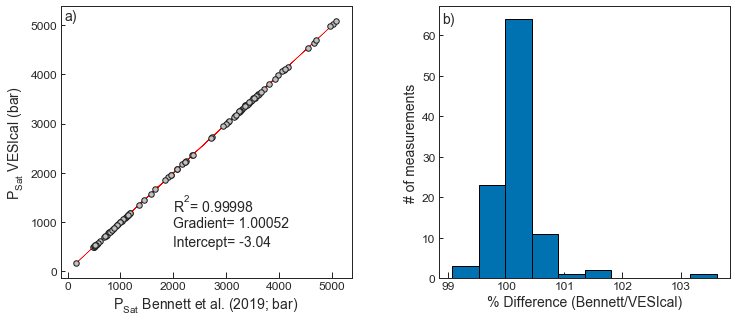

In [4]:
# This calculating a Linear regression, and plots the spreadsheet outputs against VESICal outputs
X_syn1=10*satPs_wtemps_Magmasat['Press'].values.reshape(-1, 1) 
Y_syn1=satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_syn1,Y_syn1)
Y_pred_syn1=lr.predict(X_syn1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5)) # adjust dimensions of figure here

ax1.set_xlabel('P$_{Sat}$ Bennett et al. (2019; bar)',  fontsize=14)
ax1.set_ylabel('P$_{Sat}$ VESIcal (bar)', fontsize=14)
ax1.plot(X_syn1,Y_pred_syn1, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
ax1.scatter(X_syn1, Y_syn1,  s=30, edgecolors='k', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 2))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_syn1, Y_pred_syn1), 5)) 


ax1.text(2000, 500, I, fontsize=14)
ax1.text(2000, 900, G, fontsize=14)
ax1.text(2000, 1200, R, fontsize=14)

############## Histogram showing difference as a %
ax2.set_xlabel('% Difference (Bennett/VESIcal)',  fontsize=14)
ax2.set_ylabel('# of measurements',  fontsize=14)
ax2.hist(100*10*satPs_wtemps_Magmasat['Press']/satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'])
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)

ax1.text(-50, 5100, 'a)', fontsize=14)
ax2.text(98.9, 63, 'b)', fontsize=14)

fig.savefig('Magmasat_Test1.png', transparent=True)



# Test 2 - Recreating isobars in Fig. 14 of  Ghioso and Gualda, 2015


In [5]:
myfile_Isobars= v.BatchFile('S5_Testing_Magmasat.xlsx', sheet_name='Isobars')
data_Isobars = myfile_Isobars.get_data()

In [6]:
"""To get composition from a specific sample in the input data:"""
# Note, - In Ghiorso and Gualda, 2015, it says that the isobars in Fig. 14 are calculated using the Late Bishop Tuff composition. 
#However, we get a far better match if we use the Early Bishop Tuff composition, so presume this was a typo in the original paper. 
SampleName_EarlyBT = 'EarlyBishop'

bulk_comp_EarlyBT = myfile_Isobars.get_sample_composition(SampleName_EarlyBT, normalization='standard', asSampleClass=True)
"""Define all variables to be passed to the function for calculating isobars and isopleths"""
"""Define the temperature in degrees C"""
temperature = 750

"""Define a list of pressures in bars:"""
pressures = [1000, 2000, 3000]

isobars_EarlyBT, isopleths_EarlyBT = v.calculate_isobars_and_isopleths(sample=bulk_comp_EarlyBT, points=51, smooth_isobars=False,
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                            print_status=True).result
smoothed_isobars = v.vplot.smooth_isobars_and_isopleths(isobars_EarlyBT)


Calculating isobar at 1000 bars
 done.                                                                                                                           
Calculating isobar at 2000 bars
 done.                                                                                                                           
Calculating isobar at 3000 bars
 done.                                                                                                                           
Done!


/Users/kiacovin/Dropbox/Research/__Manuscripts in Progress/__VESIcal/__TheCode/VESIcal/manuscript/Supplement/JupyterNotebooks/MagmaSat/VESIcal/calculate_classes.py:52: RuntimeWarning: temperature (750.0 oC) is outside the calibration range of the MagmaSat model (800.0-1400.0 oC). 
  w.warn(self.calib_check,RuntimeWarning)


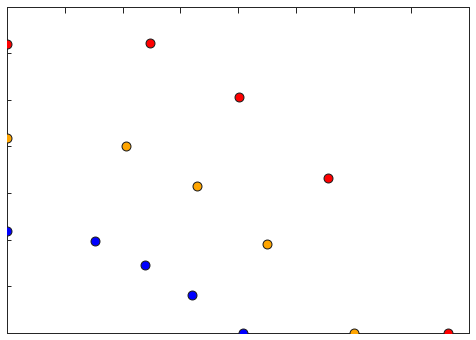

In [7]:
# Overlaid in adobe illustator - pasted below
index1000bars_Early=isobars_EarlyBT["Pressure"]==1000
index2000bars_Early=isobars_EarlyBT["Pressure"]==2000
index3000bars_Early=isobars_EarlyBT["Pressure"]==3000
H2O=isobars_EarlyBT["H2O_liq"]
CO2=isobars_EarlyBT["CO2_liq"]
fig, ax1 = plt.subplots(figsize = (6*1.38,4.*1.50))
plt.scatter(H2O[index1000bars_Early], CO2[index1000bars_Early], s=80, edgecolors='k', facecolors='blue', marker='o', zorder=5, label='100 Mpa')
plt.scatter(H2O[index2000bars_Early], CO2[index2000bars_Early], s=80, edgecolors='k', facecolors='orange', marker='o', zorder=5, label='200 Mpa')
plt.scatter(H2O[index3000bars_Early], CO2[index3000bars_Early],  s=80, edgecolors='k', facecolors='red', marker='o', zorder=5, label='300 Mpa')

plt.xlim([0, 8])
plt.ylim([0, 0.14])
ax1.yaxis.tick_left()
ax1.xaxis.tick_top()
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7])
plt.yticks([0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)
fig.savefig('Magmasat_isobars_EarlyBishopTuff.svg', transparent=True)

![Description](Magmasat_Isobars.png)


# Test 3 
- compares X$_{H_{2}O}$ calculated using the "Fluid+magma from bulk composition" option of the web app with the calculate$\_$equilibrium$\_$fluid$\_$comp function of VESIcal

In [8]:
myfile_FM= v.BatchFile('S5_Testing_Magmasat.xlsx', sheet_name='Calculate_Eq_Fluid') # Loads outputs from web app. 
data_FM = myfile_FM.get_data()
eqfluid_wtemps = myfile_FM.calculate_equilibrium_fluid_comp(temperature='Temp', pressure='Press')
eqfluid_wtemps

,SiO2,TiO2,Al2O3,Fe2O3,FeO,MnO,MgO,CaO,Na2O,K2O,...,Unnamed: 21,if clear,Unnamed: 23,Cr2O3,NiO,CoO,XH2O_fl_VESIcal,XCO2_fl_VESIcal,Model,Warnings
1,77.7,0.08,12.5,0.192,0.487,0,0.03,0.43,3.99,4.89,...,0.0,0.00,0.00,0.0,0.0,0.0,0.781343,0.218657,MagmaSat,temperature (750.0 oC) is outside the calibrat...
2,77.7,0.08,12.5,0.192,0.487,0,0.03,0.43,3.99,4.89,...,0.0,0.00,0.00,0.0,0.0,0.0,0.975030,0.024970,MagmaSat,temperature (750.0 oC) is outside the calibrat...
3,77.7,0.08,12.5,0.192,0.487,0,0.03,0.43,3.99,4.89,...,0.0,0.00,0.00,0.0,0.0,0.0,0.992303,0.007697,MagmaSat,temperature (750.0 oC) is outside the calibrat...
4,77.7,0.08,12.5,0.192,0.487,0,0.03,0.43,3.99,4.89,...,0.0,0.00,0.00,0.0,0.0,0.0,0.869759,0.130241,MagmaSat,temperature (750.0 oC) is outside the calibrat...
5,77.7,0.08,12.5,0.192,0.487,0,0.03,0.43,3.99,4.89,...,0.0,0.00,0.00,0.0,0.0,0.0,0.763398,0.236602,MagmaSat,temperature (750.0 oC) is outside the calibrat...
6,77.7,0.08,12.5,0.192,0.487,0,0.03,0.43,3.99,4.89,...,0.0,0.00,0.00,0.0,0.0,0.0,0.911737,0.088263,MagmaSat,temperature (750.0 oC) is outside the calibrat...
7,77.7,0.08,12.5,0.192,0.487,0,0.03,0.43,3.99,4.89,...,0.0,0.93,0.07,0.0,0.0,0.0,0.818871,0.181129,MagmaSat,temperature (750.0 oC) is outside the calibrat...
8,77.7,0.08,12.5,0.192,0.487,0,0.03,0.43,3.99,4.89,...,0.0,0.00,0.00,0.0,0.0,0.0,0.802572,0.197428,MagmaSat,
9,77.7,0.08,12.5,0.192,0.487,0,0.03,0.43,3.99,4.89,...,0.0,0.00,0.00,0.0,0.0,0.0,0.797407,0.202593,MagmaSat,
10,70.7,0.08,12.5,0.192,0.487,0,7.03,0.43,3.99,4.89,...,0.0,0.00,0.00,0.0,0.0,0.0,0.772785,0.227215,MagmaSat,temperature (750.0 oC) is outside the calibrat...


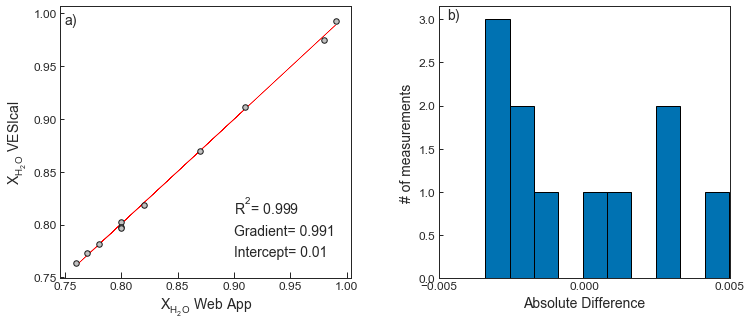

In [9]:
# This calculating a Linear regression, and plots the spreadsheet outputs against VESICal outputs
X_syn1=eqfluid_wtemps['H2Ofluidfrac_web'].values.reshape(-1, 1) 
Y_syn1=eqfluid_wtemps['XH2O_fl_VESIcal'].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_syn1,Y_syn1)
Y_pred_syn1=lr.predict(X_syn1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5)) # adjust dimensions of figure here

ax1.set_xlabel('X$_{H_{2}O}$ Web App',  fontsize=14)
ax1.set_ylabel('X$_{H_{2}O}$ VESIcal', fontsize=14)
ax1.plot(X_syn1,Y_pred_syn1, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
ax1.scatter(X_syn1, Y_syn1,  s=30, edgecolors='k', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 2))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 3))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_syn1, Y_pred_syn1), 3)) 


ax1.text(0.9, 0.77, I, fontsize=14)
ax1.text(0.9, 0.79, G, fontsize=14)
ax1.text(0.9, 0.81, R, fontsize=14)
ax1.tick_params(axis="x", labelsize=12)
ax1.tick_params(axis="y", labelsize=12)
############## Histogram showing difference as a %
ax2.set_xlabel('Absolute Difference',  fontsize=14)
ax2.set_ylabel('# of measurements',  fontsize=14)
X_syn1=eqfluid_wtemps['H2Ofluidfrac_web'].values.reshape(-1, 1) 
Y_syn1=eqfluid_wtemps['XH2O_fl_VESIcal'].values.reshape(-1, 1)
ax2.set_xlim([-0.005, 0.005])
ax2.set_xticks([-0.005, 0, 0.005])
ax2.hist(eqfluid_wtemps['H2Ofluidfrac_web']-eqfluid_wtemps['XH2O_fl_VESIcal'])
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)
ax1.text(0.75, 0.99, 'a)', fontsize=14)
ax2.text(-0.0047, 3, 'b)', fontsize=14)
fig.savefig('Magmasat_Test2.png', transparent=True)
#fig.suptitle('Test 2 - Comparing dissolved H$_2$O contents', fontsize=15)
